In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (accuracy_score, classification_report,log_loss, confusion_matrix,mean_squared_error, r2_score,precision_score,recall_score)

In [2]:
telecom_df = pd.read_csv('train.csv/train.csv')
test_df = pd.read_csv('test/test.csv')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
i_rows,i_cols = telecom_df.shape

In [4]:
telecom_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [5]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [6]:
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,07-10-2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,06-12-2014,07-10-2014,8/26/2014,0,0,0,NaN,07-08-2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,N

In [9]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [10]:
## Drop columns where only one value is there or different value exists for every row.
unique_cols = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
               'last_date_of_month_7','last_date_of_month_8',
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7']

telecom_df.drop(unique_cols,axis=1,inplace=True)
test_df.drop(unique_cols,axis=1,inplace=True)

In [11]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [12]:
for col in date_cols:
    telecom_df[col]=pd.to_datetime(telecom_df[col])
    test_df[col]=pd.to_datetime(test_df[col])
    

In [13]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech_data(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_data_8']))):
        return (d1-row['date_of_last_rech_data_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_7']))):
        return (d1-row['date_of_last_rech_data_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_6']))):
        return (d1-row['date_of_last_rech_data_6'].to_pydatetime()).days
    
    return 90

In [14]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_8']))):
        return (d1-row['date_of_last_rech_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_7']))):
        return (d1-row['date_of_last_rech_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_6']))):
        return (d1-row['date_of_last_rech_6'].to_pydatetime()).days
    
    return 90

In [15]:
telecom_df['days_since_last_rech_data'] = telecom_df.apply(lambda row:fill_days_since_rech_data(row),axis=1)
test_df['days_since_last_rech_data'] = test_df.apply(lambda row:fill_days_since_rech_data(row),axis=1)

In [16]:
telecom_df['days_since_last_rech'] = telecom_df.apply(lambda row:fill_days_since_rech(row),axis=1)
test_df['days_since_last_rech'] = test_df.apply(lambda row:fill_days_since_rech(row),axis=1)

In [17]:
telecom_df.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
        'date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)
test_df.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
        'date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)

In [18]:
telecom_df['tot_rech_amt_data_6'] = (telecom_df['count_rech_2g_6'] + telecom_df['count_rech_3g_6'])*telecom_df['av_rech_amt_data_6']
telecom_df['tot_rech_amt_data_7'] = (telecom_df['count_rech_2g_7'] + telecom_df['count_rech_3g_7'])*telecom_df['av_rech_amt_data_7']
telecom_df['tot_rech_amt_data_8'] = (telecom_df['count_rech_2g_8'] + telecom_df['count_rech_3g_8'])*telecom_df['av_rech_amt_data_8']

In [19]:
# calculate the monthly total recharge amount for the month of June, July and Aug
telecom_df['tot_month_rech_6'] = telecom_df['total_rech_amt_6'] + telecom_df['tot_rech_amt_data_6']
telecom_df['tot_month_rech_7'] = telecom_df['total_rech_amt_7'] + telecom_df['tot_rech_amt_data_7']
telecom_df['tot_month_rech_8'] = telecom_df['total_rech_amt_8'] + telecom_df['tot_rech_amt_data_8']

In [20]:
test_df['tot_rech_amt_data_6'] = (test_df['count_rech_2g_6'] + test_df['count_rech_3g_6'])*test_df['av_rech_amt_data_6']
test_df['tot_rech_amt_data_7'] = (test_df['count_rech_2g_7'] + test_df['count_rech_3g_7'])*test_df['av_rech_amt_data_7']
test_df['tot_rech_amt_data_8'] = (test_df['count_rech_2g_8'] + test_df['count_rech_3g_8'])*test_df['av_rech_amt_data_8']

In [21]:
# calculate the monthly total recharge amount for the month of June, July and Aug
test_df['tot_month_rech_6'] = test_df['total_rech_amt_6'] + test_df['tot_rech_amt_data_6']
test_df['tot_month_rech_7'] = test_df['total_rech_amt_7'] + test_df['tot_rech_amt_data_7']
test_df['tot_month_rech_8'] = test_df['total_rech_amt_8'] + test_df['tot_rech_amt_data_8']

In [22]:
drop_cols = ['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
            'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
            'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
telecom_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(drop_cols,axis=1,inplace=True)

In [23]:
col_churn_tag = ['vol_2g_mb_8', 'vol_3g_mb_8', 'total_og_mou_8', 'total_ic_mou_8']
#hg_val_cust['churn'] = hg_val_cust[col_churn_tag].apply(lambda x: 1 if( (x['vol_2g_mb_8'] == 0) & (x['vol_3g_mb_8'] == 0) & (x['total_og_mou_8'] == 0) & (x['total_ic_mou_8'] == 0 )) else 0, axis=1)
telecom_df['churn'] = telecom_df[col_churn_tag].apply(lambda x: 1 if( (x['vol_2g_mb_8'] == 0) & (x['vol_2g_mb_8'] == 0) &  (x['total_og_mou_8'] == 0) &  (x['total_ic_mou_8'] == 0)) else 0, axis=1)

In [24]:
test_df['churn'] = test_df[col_churn_tag].apply(lambda x: 1 if( (x['vol_2g_mb_8'] == 0) & (x['vol_3g_mb_8'] == 0) &  (x['total_og_mou_8'] == 0) &  (x['total_ic_mou_8'] == 0)) else 0, axis=1)

In [25]:
### Drop skewed columns

In [26]:
column_skewed = []
cols = telecom_df.select_dtypes(include='object').columns
for col in cols:
    if(df[col].value_counts().max() >= (0.95*df.shape[0])):
        column_skewed.append(col)
telecom_df.drop(column_skewed,axis=1,inplace=True)
test_df.drop(column_skewed,axis=1,inplace=True)
print("Columns getting dropped because of skewness in the the data:",column_skewed)

Columns getting dropped because of skewness in the the data: []


In [27]:
drop_cols =[]
missing_values_cols =[]
columns_to_impute = []
for col in telecom_df.columns:
    if(col not in cat_cols):
        missing_percentage = telecom_df[col].isnull().sum()*100/telecom_df.shape[0]
        if(missing_percentage>50):
            drop_cols.append(col)
        else:
            columns_to_impute.append(col)
telecom_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(drop_cols,axis=1,inplace=True)
print("Columns that are going to be dropped are :",drop_cols)

Columns that are going to be dropped are : ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'tot_month_rech_6', 'tot_month_rech_7', 'tot_month_rech_8']


In [28]:
#After this no numerical columns would be removed except for correlation.

In [29]:
#### Converting to categorical features

In [30]:
for col in cat_cols:
    cat_df = pd.get_dummies(telecom_df[col],prefix=col+"_",drop_first=True)
    telecom_df = pd.concat([telecom_df,cat_df],axis=1)
    cat_df1 = pd.get_dummies(test_df[col],prefix=col+"_",drop_first=True)
    test_df = pd.concat([test_df,cat_df1],axis=1)

In [31]:
num_cols = [col for col in telecom_df.columns  if col not in date_cols]
num_cols.remove('churn_probability')

In [32]:
for col in num_cols:
    telecom_df[col]=telecom_df[col].fillna(0)
    test_df[col]=test_df[col].fillna(0)

In [33]:
telecom_df.isnull().sum().sum()

0

In [34]:
f_rows,f_cols = telecom_df.shape
print("Row dropped during processing:",(i_rows-f_rows))
print("Columns dropped during processing:",(i_cols-f_cols))

Row dropped during processing: 0
Columns dropped during processing: 33


In [35]:
#### Pairwise - Correlation between columns and removing based on that.. 

In [36]:
def get_redundant_pairs(s):
    '''Get correlation with same pairs remove the values'''
    pairs_to_drop = set()
    cols = s.keys()
    for k1,k2 in cols:
        if(k1==k2):
            pairs_to_drop.add((k1,k2))
    return pairs_to_drop

def get_top_abs_correlations(df, c=0.8):
    corr = df.corr()
    corr_1= corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
    au_corr = corr_1.stack()
    #print(set(au_corr.index.get_level_values(1)))
    #au_corr[abs(au_corr)>c].to_csv("corr.csv")
    #au_corr = df.corr().abs().unstack()
    #labels_to_drop = get_redundant_pairs(au_corr)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[abs(au_corr)>c]


In [37]:
get_top_abs_correlations(telecom_df,c=0.7)

arpu_6                     arpu_7                       0.743730
arpu_7                     arpu_8                       0.782332
onnet_mou_6                onnet_mou_7                  0.733298
                           std_og_t2t_mou_6             0.855785
                           total_og_mou_6               0.754065
onnet_mou_7                onnet_mou_8                  0.787288
                           std_og_t2t_mou_7             0.862664
                           total_og_mou_7               0.759647
onnet_mou_8                std_og_t2t_mou_8             0.863429
                           total_og_mou_8               0.758814
offnet_mou_6               offnet_mou_7                 0.739430
                           std_og_t2m_mou_6             0.831909
                           total_og_mou_6               0.779065
offnet_mou_7               offnet_mou_8                 0.755802
                           std_og_t2m_mou_7             0.855804
                         

In [38]:
### Since the number of variables is quiet huge , lets find out hightly correlated variables with the churn and explore those variables

In [39]:
absCorrWithDep={}
y = telecom_df['churn_probability']
X = telecom_df

In [40]:
for col in X.columns:
    absCorrWithDep[col]=abs(y.corr(X[col]))

In [41]:
dict(sorted(absCorrWithDep.items(), key=lambda item: item[1],reverse=True))

{'loc_og_t2m_mou_8': 0.16129910175399217,
 'arpu_8': 0.15756638032324105,
 'loc_og_mou_8': 0.15509161348355552,
 'offnet_mou_8': 0.13101235957762533,
 'loc_og_t2m_mou_7': 0.11355412441826603,
 'loc_og_mou_7': 0.11150262526964765,
 'onnet_mou_8': 0.08416606851084454,
 'loc_og_t2t_mou_8': 0.08109986645693071,
 'loc_og_t2m_mou_6': 0.07588711681415634,
 'loc_og_mou_6': 0.07536055131751192,
 'loc_og_t2f_mou_8': 0.07463336423555765,
 'std_og_t2t_mou_6': 0.06942572399676802,
 'roam_og_mou_7': 0.06807686490746183,
 'std_og_t2m_mou_6': 0.06619411472192657,
 'loc_og_t2t_mou_7': 0.05963894710128637,
 'loc_og_t2f_mou_7': 0.0591541834489307,
 'std_og_t2t_mou_8': 0.05849385108477265,
 'roam_og_mou_8': 0.05842557809168069,
 'arpu_7': 0.05780915203476295,
 'roam_ic_mou_7': 0.053837253473336094,
 'roam_og_mou_6': 0.05126257469177311,
 'roam_ic_mou_8': 0.050802200879935366,
 'loc_og_t2f_mou_6': 0.04985355703939843,
 'offnet_mou_7': 0.04584125434062911,
 'onnet_mou_6': 0.04439363175955668,
 'loc_og_t2c_m

In [42]:
high_corr_cols = ['loc_og_t2m_mou_8', 'arpu_8', 'loc_og_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_7','loc_og_mou_7',
 'onnet_mou_8', 'loc_og_t2t_mou_8','loc_og_t2m_mou_6', 'loc_og_mou_6','loc_og_t2f_mou_8','std_og_t2t_mou_6','roam_og_mou_7']

In [43]:
### Correlation between variables

<AxesSubplot:>

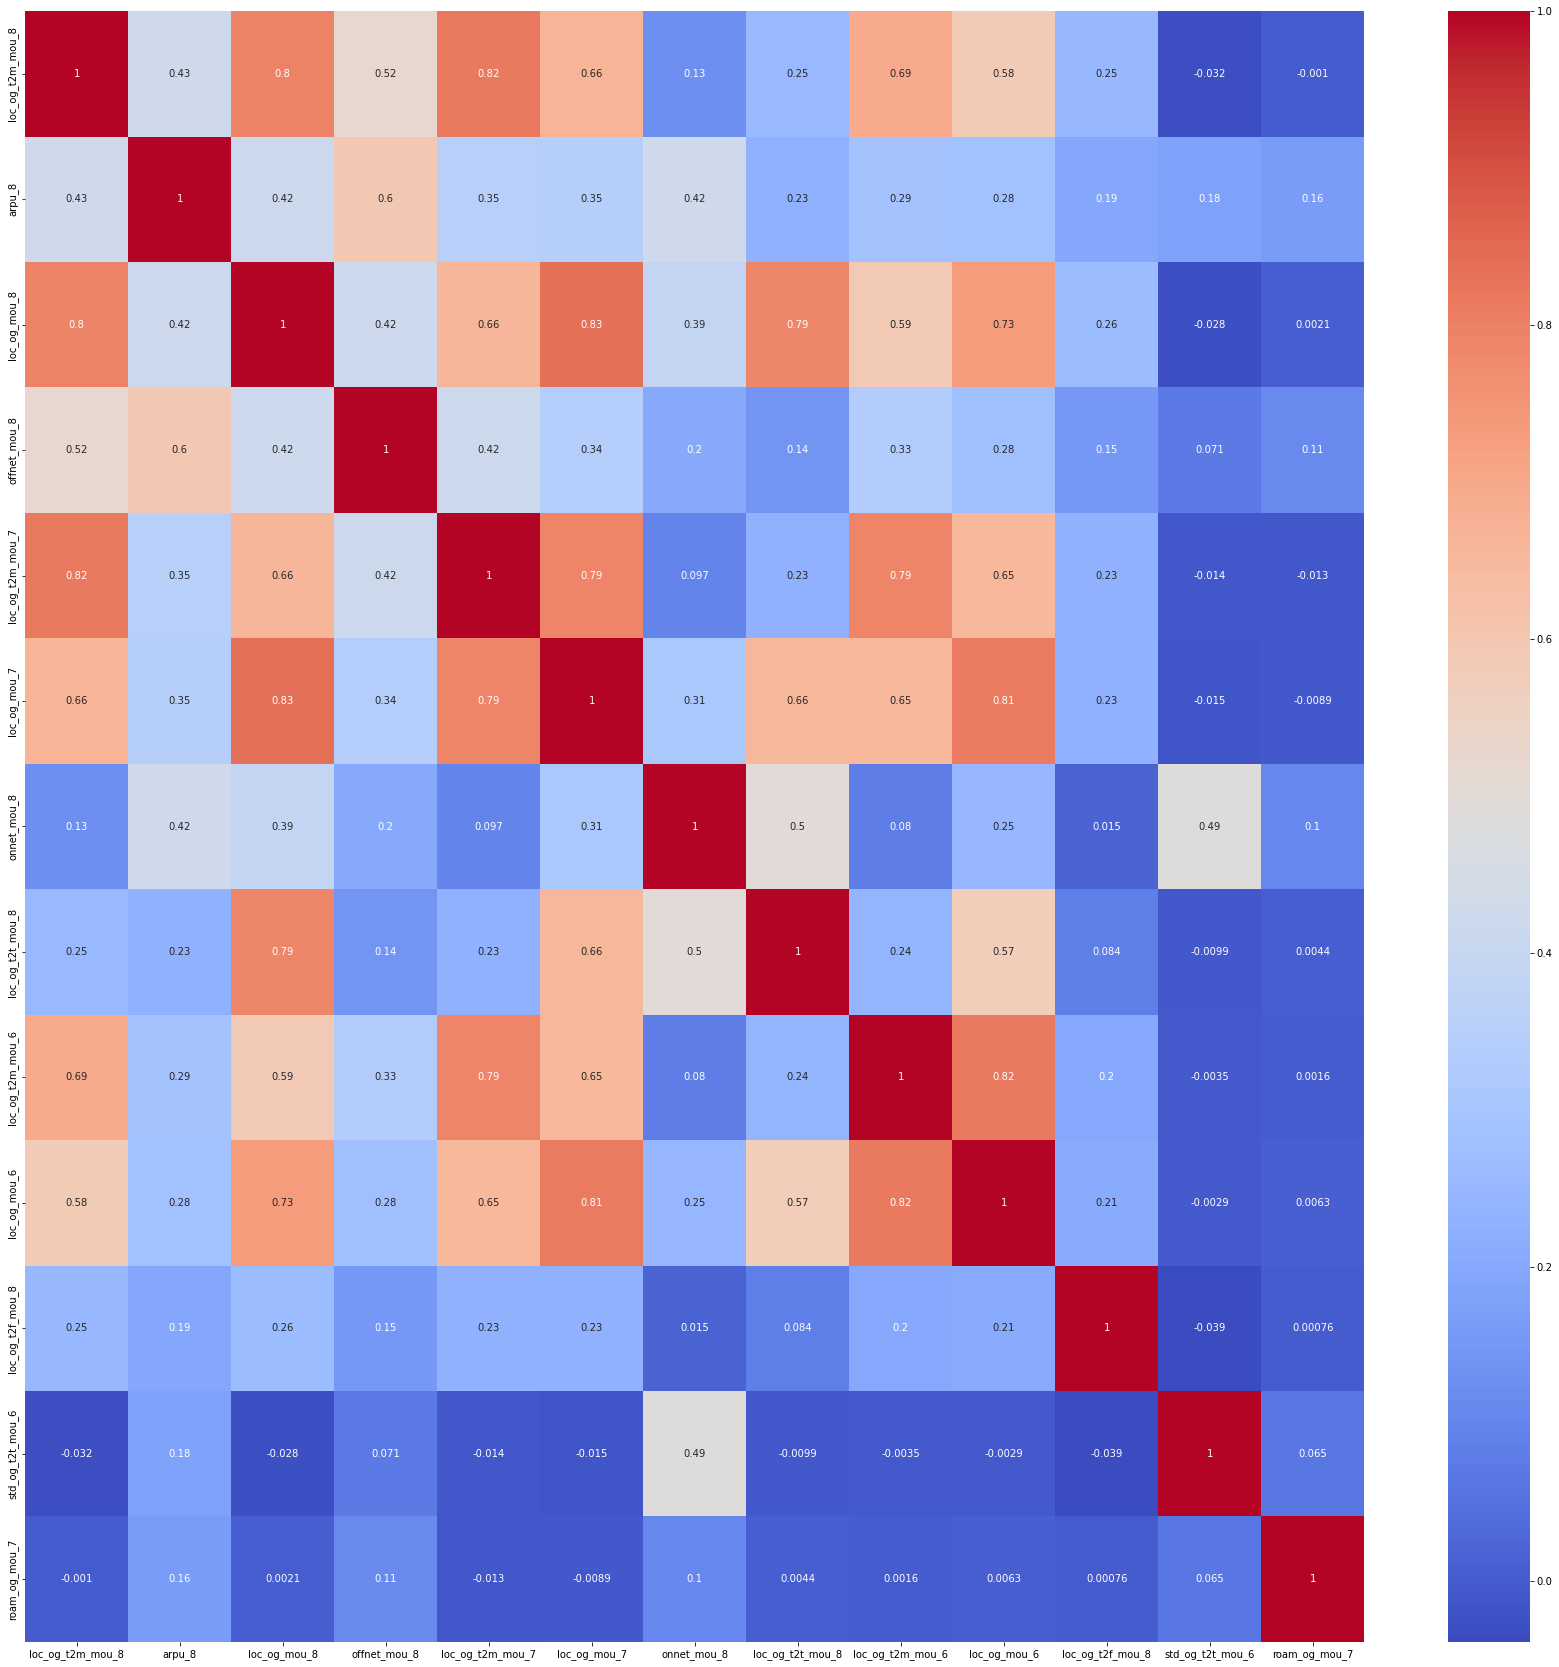

In [44]:
corr_mat = telecom_df[high_corr_cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

In [45]:
## From the figure above, we can conclude even with this variables there is high correlation, lets detect those columns 


In [46]:
get_top_abs_correlations(telecom_df[high_corr_cols],c=0.7)

loc_og_t2m_mou_8  loc_og_mou_8        0.795978
                  loc_og_t2m_mou_7    0.815128
loc_og_mou_8      loc_og_mou_7        0.834978
                  loc_og_t2t_mou_8    0.786091
                  loc_og_mou_6        0.733176
loc_og_t2m_mou_7  loc_og_mou_7        0.792761
                  loc_og_t2m_mou_6    0.792006
loc_og_mou_7      loc_og_mou_6        0.813185
loc_og_t2m_mou_6  loc_og_mou_6        0.816215
dtype: float64

In [47]:
## There seems to be a linear relationship between the variables. Let us use PCA to take care of that , 
##  or else it would be manual task to find and remove multicollienarity

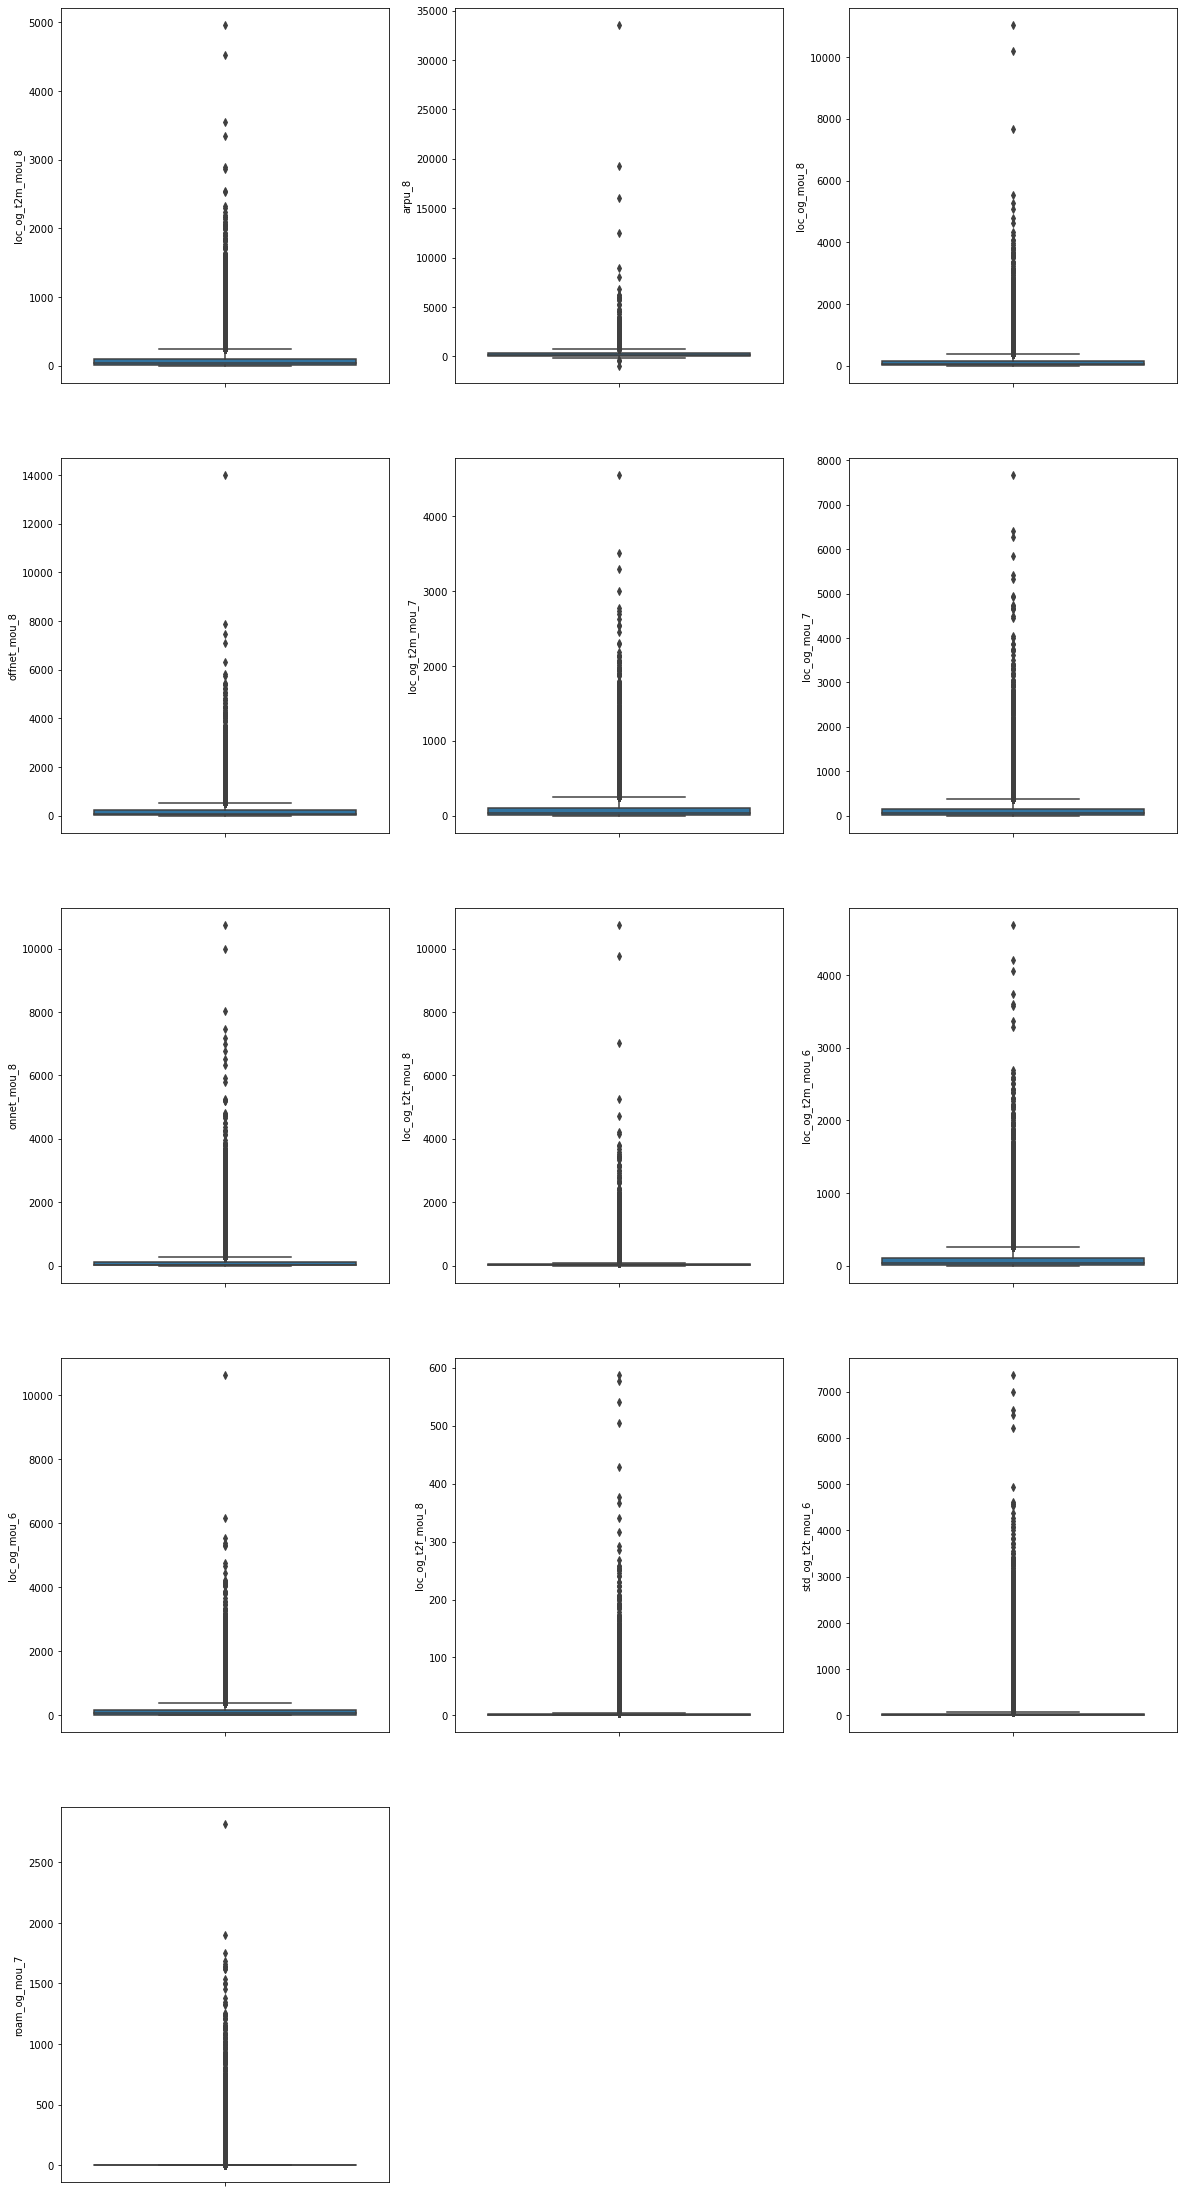

In [48]:
plt.figure(figsize=(20,40))
i =1
## Distribution of the variables
for col in high_corr_cols:
    plt.subplot(5,3,i)
    sns.boxplot(y=col,data=telecom_df)
    i= i +1

In [49]:
def remove_outlier(df,col):
    i_rows,i_cols = df.shape
    Q1=df[col].quantile(0.20)
    Q3= df[col].quantile(0.90)
    IQR = Q3-Q1
    df= df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    f_rows,f_cols = df.shape
    print('{} outliers has been removed in {}'.format(i_rows-f_rows,col))
    return df

In [50]:
for col in high_corr_cols:
    telecom_df = remove_outlier(telecom_df,col)
    test_df= remove_outlier(test_df,col)

1263 outliers has been removed in loc_og_t2m_mou_8
578 outliers has been removed in loc_og_t2m_mou_8
650 outliers has been removed in arpu_8
283 outliers has been removed in arpu_8
639 outliers has been removed in loc_og_mou_8
297 outliers has been removed in loc_og_mou_8
1160 outliers has been removed in offnet_mou_8
459 outliers has been removed in offnet_mou_8
727 outliers has been removed in loc_og_t2m_mou_7
305 outliers has been removed in loc_og_t2m_mou_7
316 outliers has been removed in loc_og_mou_7
147 outliers has been removed in loc_og_mou_7
2103 outliers has been removed in onnet_mou_8
902 outliers has been removed in onnet_mou_8
1353 outliers has been removed in loc_og_t2t_mou_8
565 outliers has been removed in loc_og_t2t_mou_8
576 outliers has been removed in loc_og_t2m_mou_6
206 outliers has been removed in loc_og_t2m_mou_6
203 outliers has been removed in loc_og_mou_6
85 outliers has been removed in loc_og_mou_6
2344 outliers has been removed in loc_og_t2f_mou_8
959 outl

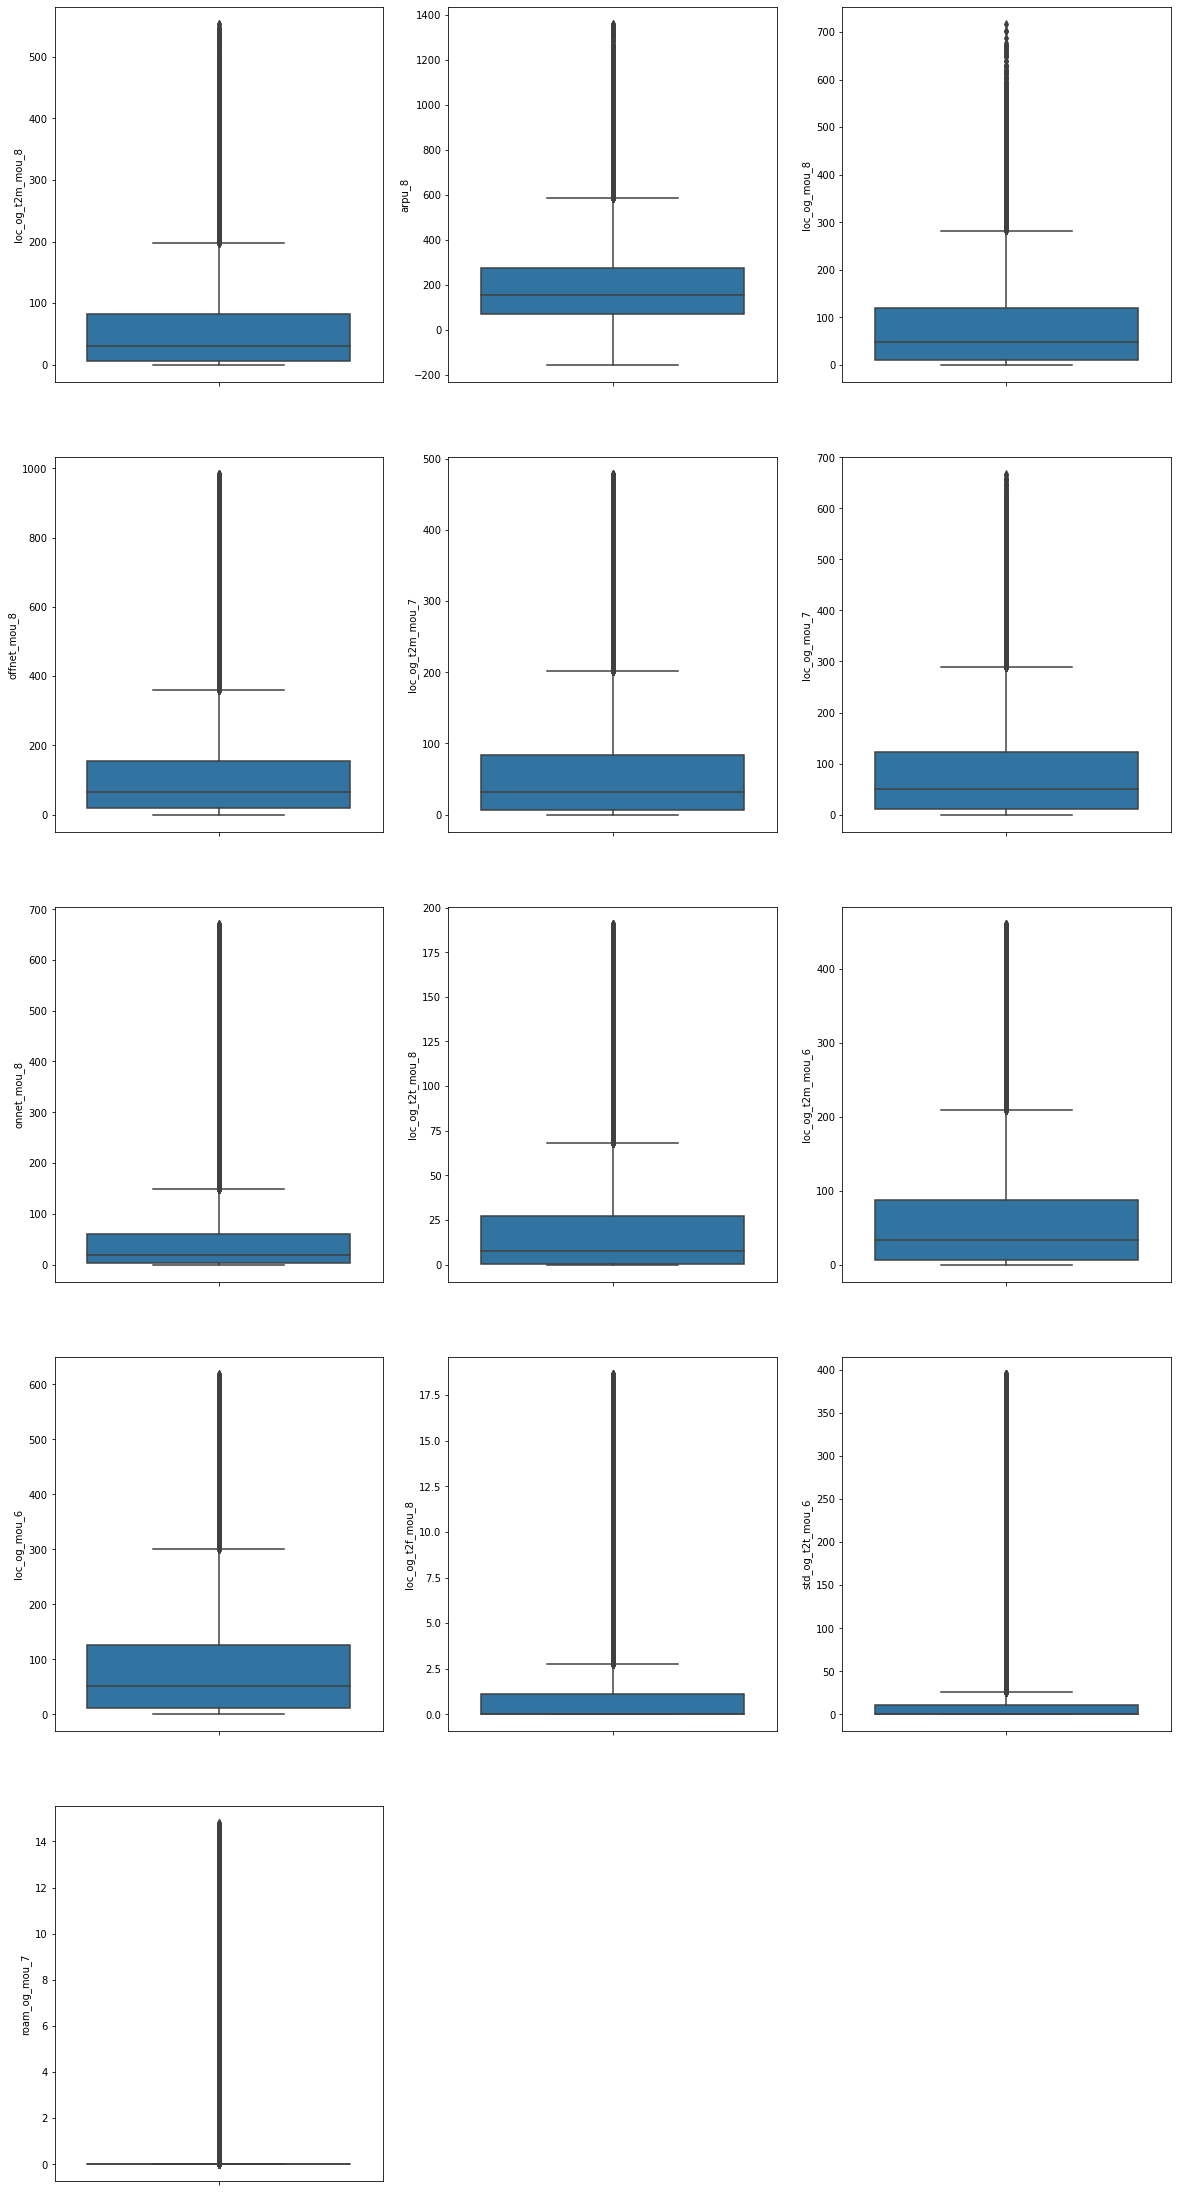

In [51]:
plt.figure(figsize=(20,40))
i =1
## Distribution of the variables
for col in high_corr_cols:
    plt.subplot(5,3,i)
    sns.boxplot(y=col,data=telecom_df)
    i= i +1

In [52]:
telecom_df.groupby(['churn_probability']).mean()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_data,days_since_last_rech,churn,night_pck_user_6__1.0,night_pck_user_7__1.0,night_pck_user_8__1.0,fb_user_6__1.0,fb_user_7__1.0,fb_user_8__1.0
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,203.110956,202.566384,210.790808,51.644823,57.353061,57.732821,127.328205,128.181545,127.951208,4.842158,0.633565,2.478124,5.768972,0.320518,2.778351,25.402216,24.601213,23.400836,65.047442,64.789554,65.629723,2.174372,2.119077,1.587955,0.963422,1.174697,1.286041,92.630928,91.516898,90.625523,24.161230,32.630156,33.366457,52.450010,57.004097,54.824948,0.895439,0.863560,0.822374,0.0,77.508764,90.499927,89.015916,0.378314,0.372977,0.336068,3.234058,4.211712,4.348072,0.357205,0.016599,0.019747,174.115766,186.624178,184.351594,41.094612,41.245364,40.590561,95.480574,97.638933,99.206953,10.746424,11.323997,10.411364,147.330148,150.217109,150.217772,6.976596,7.794809,8.054387,17.893012,19.959126,19.326923,1.926144,2.065735,1.930292,0.0,26.797797,29.821840,29.313809,181.649509,188.604640,188.437973,0.061626,0.039646,0.046667,6.659482,7.582296,7.918225,0.793854,0.937459,0.934869,6.581665,6.996361,6.745696,89.886063,90.216339,96.698836,54.045434,49.969122,55.900598,54.716697,55.313560,56.335969,118.013772,126.560397,134.111678,0.006022,0.006044,0.005490,0.083590,0.090571,0.089507,0.428508,0.49501,0.51595,0.067311,0.069290,0.074887,0.076057,0.082952,0.094891,0.238088,0.245217,0.255921,1243.528846,67.560974,64.141255,57.099518,64.946053,6.372582,0.016088,0.006022,0.006044,0.005490,0.238088,0.245217,0.255921
1,235.979779,155.764991,76.811006,59.395366,50.119814,20.637335,162.261650,110.710952,42.325493,8.043582,1.781240,4.924523,11.043741,0.790156,6.952242,16.433089,10.929360,3.705038,41.494850,27.394277,10.544457,1.379673,0.925461,0.264683,0.927434,1.199408,0.469669,59.312347,39.252642,14.515947,39.066725,38.921547,14.363956,107.622236,78.393012,26.052523,0.448838,0.364246,0.103063,0.0,147.140313,117.680705,40.520499,1.184081,0.525541,0.144455,3.807244,4.177040,1.376594,0.531703,0.014624,0.000735,211.982446,161.6

In [53]:
## There seems to be a steady decrease of revenue , usage in case of users who is going to churn, This is a valuable insight.

In [54]:
telecom_df[['churn_probability','arpu_8','arpu_7','arpu_6']].groupby('churn_probability').mean()

,arpu_8,arpu_7,arpu_6
churn_probability,,,
0,210.790808,202.566384,203.110956
1,76.811006,155.764991,235.979779


In [55]:
telecom_df = telecom_df.reset_index()
test_df= test_df.reset_index()

In [56]:
y= telecom_df.pop("churn_probability")

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(telecom_df,y, train_size=0.7,test_size=0.3,random_state=100)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(random_state=42)

In [61]:
pca.fit(X_train)

PCA(random_state=42)

In [62]:
np.all(np.isfinite(telecom_df))

True

In [63]:
pca.components_

array([[ 2.18273201e-03,  1.67755079e-01,  1.92454893e-01, ...,
         3.07277752e-02,  3.70912333e-02,  3.74622617e-02],
       [ 5.23942625e-03,  4.00045199e-02,  3.59641271e-02, ...,
         2.23136318e-01,  2.29041391e-01,  2.26885414e-01],
       [ 1.41364936e-03, -7.76994891e-02, -1.12721529e-01, ...,
        -8.24433536e-02, -9.25849805e-02, -9.17503996e-02],
       ...,
       [-0.00000000e+00, -8.84852748e-17,  2.74295616e-16, ...,
        -3.48720524e-01,  5.17147544e-01,  1.02531987e-01],
       [-0.00000000e+00, -2.95477295e-17, -8.50098022e-17, ...,
         3.53884625e-01,  3.65829211e-01, -4.33381411e-01],
       [-0.00000000e+00, -1.03642382e-16, -8.58665131e-17, ...,
        -9.83228873e-02,  4.17182566e-02, -8.64394224e-02]])

In [64]:
pca.explained_variance_ratio_

array([9.72384586e-02, 7.86394435e-02, 6.55268871e-02, 4.23851308e-02,
       3.68975873e-02, 2.90469304e-02, 2.86971627e-02, 2.59791699e-02,
       2.30327810e-02, 2.13413538e-02, 2.06881680e-02, 2.04116161e-02,
       1.86000174e-02, 1.70318240e-02, 1.68945464e-02, 1.45783038e-02,
       1.43771697e-02, 1.42941071e-02, 1.34326314e-02, 1.33362176e-02,
       1.24386222e-02, 1.23236575e-02, 1.17272761e-02, 1.14652036e-02,
       1.10371509e-02, 1.04783491e-02, 1.02363305e-02, 1.00657415e-02,
       9.52015366e-03, 8.91425372e-03, 8.55008554e-03, 8.48734653e-03,
       8.22674902e-03, 8.00961846e-03, 7.81591818e-03, 7.64945137e-03,
       7.51542545e-03, 7.27279111e-03, 7.14915167e-03, 6.88342627e-03,
       6.70570787e-03, 6.52130306e-03, 6.09337700e-03, 6.05850624e-03,
       5.88588520e-03, 5.66022638e-03, 5.55357485e-03, 5.37185592e-03,
       5.24241515e-03, 5.15141352e-03, 4.82241847e-03, 4.70869025e-03,
       4.66381682e-03, 4.45287023e-03, 4.36754389e-03, 4.14259332e-03,
      

<BarContainer object of 139 artists>

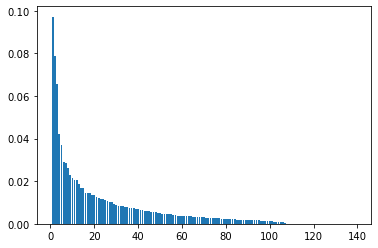

In [65]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [66]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

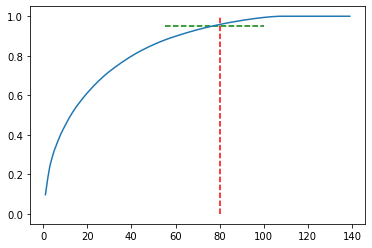

In [67]:
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100,xmin=55, colors="g", linestyles="--")

plt.plot(range(1,len(var_cumu)+1), var_cumu)


In [68]:
pca_final = PCA(n_components=80, random_state=42)

In [69]:
newdata = pca_final.fit_transform(X_train)
newdata_test= pca_final.transform(X_test)

In [70]:
newdata.shape

(36428, 80)

In [71]:
telecom_df.shape

(52041, 139)

In [72]:
cols = ["PC"+str(i) for i in range(1,81)]    

In [73]:
df_train_pca = pd.DataFrame(newdata, columns=cols)
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
0,-0.247996,-3.299336,-2.241676,2.215172,0.866801,2.373898,-1.868386,-0.553692,-1.053560,0.771153,-0.250671,-0.486392,-0.412174,-0.206762,-0.444622,-0.310763,0.306067,0.591624,-3.425440,-0.236700,-0.588148,-1.130104,0.480379,-0.412850,0.467029,0.098375,-0.462057,-0.290502,0.039309,0.755394,-0.387696,0.837022,-0.402636,0.685420,-0.564713,0.715224,-0.686931,0.116550,-0.008438,1.434403,-0.631405,-0.604432,-0.630331,0.445809,-0.656115,-0.721502,0.050066,1.329527,-0.015629,-0.374888,0.137407,0.334668,-0.956932,-0.149247,-0.000653,-0.195689,0.089633,-0.021528,-0.139924,-0.625450,-0.326772,0.550039,1.869975,-0.365175,0.511869,-0.161042,-0.225172,-0.417242,0.047021,-0.276738,0.158714,0.355401,-0.024886,-0.401884,0.160280,0.051035,0.041642,-0.083778,-0.242335,0.327699
1,-3.504378,-1.037042,1.417423,0.187541,-0.228571,-0.112301,0.213034,0.315193,-0.773395,-0.055360,-0.412941,-0.101851,-0.025778,-0.036300,-0.160420,-0.270196,0.298295,-0.178496,0.542172,-0.132340,0.142568,0.145678,0.254456,-0.059242,0.084179,-0.095485,-0.468154,-0.249568,0.355267,0.199434,0.264585,-0.370269,-0.088432,-0.162024,-0.428652,0.030686,0.010984,-0.034718,0.013201,0.318640,0.081184,0.279186,0.210883,0.051639,-1.007351,-0.098075,-0.078796,0.029503,-0.200206,0.023606,0.020627,-0.010610,-0.145436,-0.416801,0.260887,-0.206626,0.096104,0.021010,-0.050284,-0.043941,-0.139879,0.079618,0.019795,0.177144,0.036978,0.057662,-0.018198,-0.132482,-0.038677,0.021507,0.020943,-0.036507,-0.082837,-0.010736,0.033021,-0.119075,0.014407,0.043080,-0.063840,-0.231146
2,-3.677615,-0.547184,1.741591,0.195726,1.031301,-0.246224,0.536339,0.652833,-0.829399,-0.711337,0.487582,0.006035,-0.127689,-0.143378,0.260418,0.271672,-0.011120,0.212206,-0.386304,0.035980,0.754426,-0.904427,0.567901,-0.424696,0.104876,0.052991,-0.632771,0.460549,0.588675,0.237938,0.399770,0.212206,-1.407513,-0.154853,0.367168,-0.289781,0.598758,0.552964,-1.053430,0.338792,-0.120345,-1.158753,0.823435,0.769031,1.017210,0.533751,-0.535101,-0.077055,-0.379498,0.537098,0.062757,-0.130718,-0.584076,-0.564072,0.195070,0.376944,-0.315975,0.285027,0.093741,-0.025331,-0.017268,-0.046801,0.052134,0.177379,0.146604,0.008340,0.062065,0.039524,-0.310833,-0.047395,-0.232417,0.181180,-0.040963,-0.118988,0.227662,0.291885,-0.012646,-0.220292,-0.266144,-0.198324
3,-0.803719,-3.491403,-3.570826,0.225260,-0.398732,-1.557647,0.388258,0.785672,-2.971495,-0.675248,-0.099285,0.016774,-0.201024,0.242404,-0.202021,0.088889,-0.589409,0.465908,2.280876,-0.448191,0.160717,0.939690,-0.464035,0.617857,-0.278268,0.090697,-1.136619,0.055553,-1.080006,-0.383021,-1.115869,-0.355020,-0.600612,-0.287138,-0.003889,-0.540391,1.095909,0.869916,-0.371719,-0.395328,-0.095732,0.293929,0.341347,-0.792655,-0.369553,0.216915,-0.242202,-0.995964,0.297703,0.352443,0.252442,-0.095422,0.382656,0.886808,0.234946,-0.106436,0.030938,-0.042247,0.291604,0.270106,0.186642,-0.172281,-0.079416,0.014510,0.148795,0.157480,0.128462,0.183688,0.002552,0.171670,0.128946,0.087269,-0.051079,0.290590,0.086447,0.033461,-0.004694,0.014013,-0.089396,-0.254510
4,-3.246510,-1.106643,1.939949,0.898078,1.162148,1.103123,0.040122,-0.546807,-0.442863,-0.550288,0.894639,-0.183696,0.911784,-0.192494,-0.313365,-0.201785,-0.069325,-0.368570,0.621790,-0.498842,-0.303798,-0.331874,0.490491,0.095182,0.349105,0.257062,-0.868106,-1.246990,-0.197656,-0.096664,-0.365542,-0.206844,-0.558971,-0.673277,-0.349931,-0.701424,-0.052098,0.238372,0.083876,0.512090,0.755420,-0.464219,-0.291327,0.585712,1.002542,-0.284966,-0.167885,-0.194731,-0.063213,-0.013161,-0.050276,-0.361402,-0.281399,-0.745696,0.067649,-0.297721,0.014352,-

In [74]:
df_test_pca = pd.DataFrame(newdata_test, columns=cols)
df_test_pca.shape

(15613, 80)

In [75]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [76]:
corrmat.shape

(80, 80)

In [77]:
## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [80]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [81]:
y_train_pred = dt_base.predict(X_train)
y_test_pred_dt = dt_base.predict(X_test)


In [82]:
from sklearn.metrics import plot_roc_curve

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


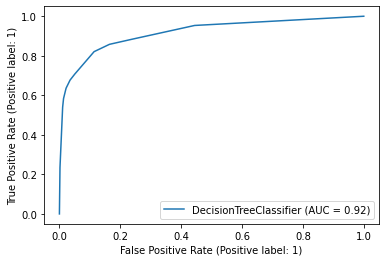

In [83]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [84]:
###  Hyperparameter tuning for decision tree

In [85]:
from sklearn.model_selection import GridSearchCV


In [86]:
dt = DecisionTreeClassifier(random_state=42)

In [87]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [88]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [89]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 1min 44s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [90]:
grid_search.best_score_ 

0.9465521027780829

In [91]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


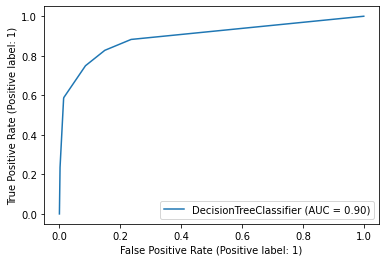

In [92]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [93]:
### Random Forest classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [96]:
%%time
rf.fit(X_train, y_train)

Wall time: 794 ms


C:\Users\idhay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [97]:
rf.oob_score_

0.9413363346876029

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


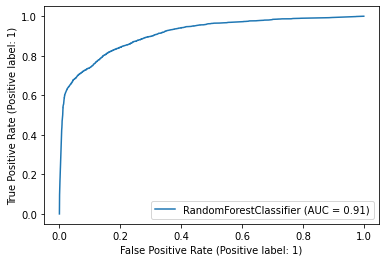

In [98]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [99]:
### Hyper parameter tuning for random forest

In [100]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [101]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [50, 100]
}

In [102]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [103]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [104]:
grid_search.best_score_

0.9473481936971561

In [105]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [106]:
y_test_rf=rf_best.predict(X_test)

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


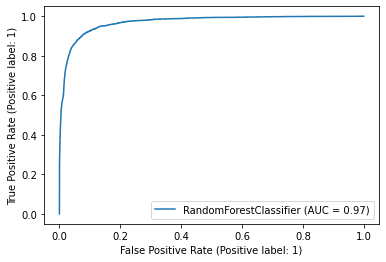

In [107]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [121]:
rf_best.feature_importances_

array([2.69033400e-03, 2.50405755e-03, 5.84541008e-03, 4.43569700e-02,
       1.84401164e-03, 1.96362482e-03, 9.09411052e-03, 3.19449320e-03,
       3.10179359e-03, 2.11682643e-02, 7.52943379e-04, 8.42242287e-04,
       1.06070599e-02, 7.59621909e-04, 8.18596744e-04, 1.29657126e-02,
       1.62081020e-03, 5.41217906e-03, 2.92184130e-02, 1.87106817e-03,
       1.42414786e-03, 2.54622619e-02, 6.96679485e-04, 6.15441329e-04,
       1.56290934e-03, 4.07896544e-04, 8.37540198e-04, 2.24568768e-04,
       2.15633021e-03, 5.13175167e-03, 4.06653265e-02, 2.09406734e-03,
       2.28874433e-03, 2.32274918e-03, 1.64567537e-03, 3.79299301e-03,
       3.35850026e-03, 1.77229747e-04, 6.99371807e-05, 1.40618942e-05,
       0.00000000e+00, 2.79595625e-03, 3.25505619e-03, 6.16081533e-03,
       1.90698935e-04, 1.47798032e-04, 1.97384283e-04, 8.58077467e-04,
       1.69853999e-03, 1.57478994e-03, 4.63893620e-04, 0.00000000e+00,
       0.00000000e+00, 3.03930777e-03, 1.09508483e-02, 5.54772837e-02,
      

In [124]:
precision_score(y_test,y_test_rf)

0.8058161350844277

In [130]:
recall_score(y_test,y_test_rf)

0.5772849462365591

In [131]:
confusion_matrix(y_test,y_test_rf)

array([[13918,   207],
       [  629,   859]], dtype=int64)

In [129]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14125
           1       0.81      0.58      0.67      1488

    accuracy                           0.95     15613
   macro avg       0.88      0.78      0.82     15613
weighted avg       0.94      0.95      0.94     15613



In [109]:
# imp_df = pd.DataFrame({
#     "Varname": X_train.columns,
#     "Imp": rf_best.feature_importances_
# })

In [110]:
#imp_df.sort_values(by="Imp", ascending=False)

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)


# No of Models 

# from sklearn.ensemble.AdaBoost
# Accuracy or AUC is chagin with no of Model ( Weak Models )

In [113]:
#Fitting Model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [114]:
#pred
y_pred_ada = adaboost.predict(X_test)

In [115]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred_ada))

Accuracy of the model is:   0.9435086146160251


In [116]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[13818   307]
 [  575   913]]


In [117]:
model_comp = pd.DataFrame({"R2 Score":r2_score(y_test,y_test_pred_dt)
                           ,"RSS":np.sum(np.square(y_test-y_test_pred_dt)),
                           "MSE":mean_squared_error(y_test,y_test_pred_dt),
                           "RMSE":mean_squared_error(y_test,y_test_pred_dt)**0.5},
                          index=['Decision Tree'])

In [118]:
model_comp = model_comp.append( pd.DataFrame({"R2 Score":r2_score(y_test,y_test_rf),
                            "RSS":np.sum(np.square(y_test-y_test_rf)),
                            "MSE":mean_squared_error(y_test,y_test_rf),
                            "RMSE":mean_squared_error(y_test,y_test_rf)**0.5},
                                index=['Random Forest']))

In [119]:
model_comp = model_comp.append( pd.DataFrame({"R2 Score":r2_score(y_test,y_pred_ada),
                            "RSS":np.sum(np.square(y_test-y_pred_ada)),
                            "MSE":mean_squared_error(y_test,y_pred_ada),
                            "RMSE":mean_squared_error(y_test,y_pred_ada)**0.5},
                                index=['Ada Boost']))

In [120]:
model_comp

,R2 Score,RSS,MSE,RMSE
Decision Tree,0.368586,850,0.054442,0.233328
Random Forest,0.378986,836,0.053545,0.231398
Ada Boost,0.344816,882,0.056491,0.237679
